# Lead-lag ilişkisi için incelemeye giriş
2018-11-26 ve 2018-11-30 günleri için teo-fiyat değerlerine bağlı nedensellik çalışması. 


['causality181126_75656_8205765_4.csv', 'causality181129_75656_8205765_4.csv', 'causality181130_75656_8205765_4.csv', 'causality181203_75656_8205765_4.csv', 'causality181205_75656_8205765_4.csv', 'causality181206_75656_8205765_4.csv', 'causality181207_75656_8205765_4.csv', 'causality181210_75656_8205765_4.csv', 'causality181211_75656_8205765_4.csv', 'causality181218_75656_8205765_4.csv', 'causality181219_75656_8205765_4.csv']
Index(['pivot_diff', 'x_diff_0-0', 'x_diff_5-0', 'x_diff_6-0', 'x_diff_7-0',
       'x_diff_8-0', 'x_diff_10-0', 'x_diff_12-0', 'x_diff_14-0',
       'x_diff_20-0'],
      dtype='object')
x_diff_5-0
x_diff_8-0
x_diff_14-0
x_diff_5-0
x_diff_8-0
x_diff_14-0


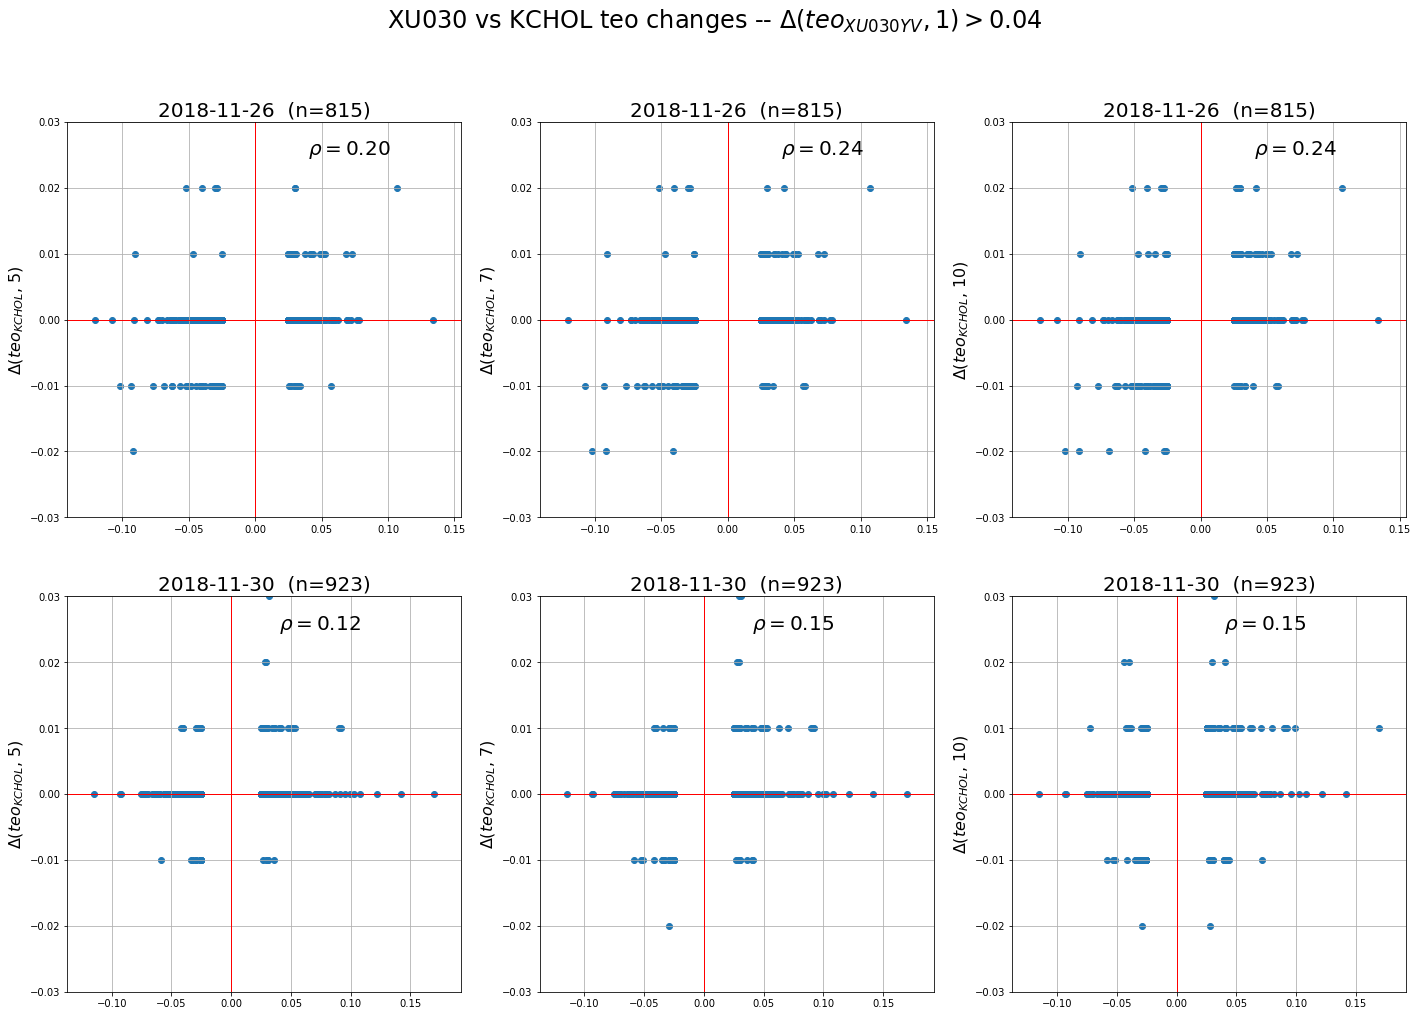


Index(['no', 'ts', 'pivot_bid_0', 'pivot_teo_0', 'pivot_ask_0', 'pivot_bid_4',
       'pivot_teo_4', 'pivot_ask_4', 'x_bid_0', 'x_teo_0', 'x_ask_0',
       'x_bid_5', 'x_teo_5', 'x_ask_5', 'x_bid_6', 'x_teo_6', 'x_ask_6',
       'x_bid_7', 'x_teo_7', 'x_ask_7', 'x_bid_8', 'x_teo_8', 'x_ask_8',
       'x_bid_10', 'x_teo_10', 'x_ask_10', 'x_bid_12', 'x_teo_12', 'x_ask_12',
       'x_bid_14', 'x_teo_14', 'x_ask_14', 'x_bid_20', 'x_teo_20', 'x_ask_20',
       'pivot_diff', 'x_diff_0-0', 'x_diff_5-0', 'x_diff_6-0', 'x_diff_7-0',
       'x_diff_8-0', 'x_diff_10-0', 'x_diff_12-0', 'x_diff_14-0',
       'x_diff_20-0'],
      dtype='object')


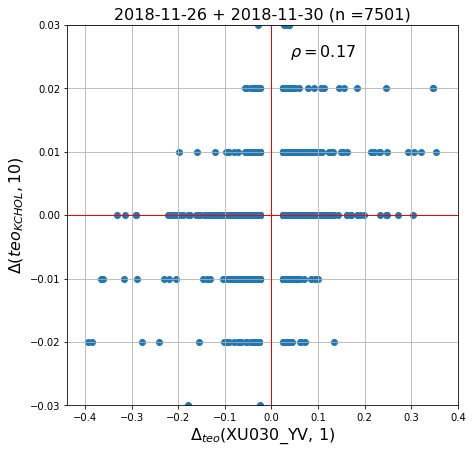

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from functools import reduce

o_files = []
os.chdir('/home/hrn/pyITCH/causality/')
for file in os.listdir():
    if file.startswith('causality') and file.endswith("75656_8205765_4.csv"):
        o_files.append(file)
o_files.sort()
# 31, 32, 33
print(o_files)
x_l = [pd.read_csv(f) for f in o_files]
x_l = [x.loc[abs(x['pivot_diff']) > 0.015] for x in x_l]
# print(o_files)



fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(24,16))
fig.suptitle('XU030 vs KCHOL teo changes -- $\Delta(teo_{XU030YV},1) > 0.04$', fontsize=24)
time_leaps = [5,7,10]
days = ['2018-11-26', '2018-11-30']
print(x_l[1].columns[35:])

for i, row in enumerate(ax):
    x=x_l[i+3]
    xx = x['pivot_diff']
    n = len(xx)
    for j, col in enumerate(row):
        yy = x.iloc[:,37 + 3 * j]
        print(x.columns[37 + 3 * j])
        # print(yy)
        rho, p_value = stats.pearsonr(xx, yy)
        col.scatter(xx ,yy)
        col.set_ylabel('$\Delta(teo_{KCHOL}$, ' +
                       time_leaps[j].__str__()+ ')',
                       fontsize=16)
        col.axhline(linewidth=1, color='r')
        col.axvline(linewidth=1, color='r')
        col.grid(True)
        col.set_ylim((-0.03, 0.03))
        col.set_title(days[i] +'  (n=' + str(n) + ')', fontsize=20)
        col.text(0.04,0.025,r'$\rho = {0:.2f}$'.format(rho),fontsize=20)
plt.show()

x = pd.concat(x_l)
print("")
[i for i,x  in enumerate(x.columns) if x == 'pivot_diff']
ind,  = np.where(x.columns =='pivot_diff')
print(x.columns)
pairs = x['pivot_diff'] , x['x_diff_12-0']
# np.corrcoef(pairs)
a = np.array(pairs).transpose()
rho, p_value = stats.pearsonr(a[:,0], a[:,1])

plt.figure(figsize=(7,7))
plt.xlabel('$\Delta_{teo}$(XU030_YV, 1)',fontsize=16)
plt.ylabel('$\Delta(teo_{KCHOL},10)$',fontsize=16)
plt.scatter(a[:,0], a[:,1])
plt.grid(True)
plt.axhline(linewidth=1, color='r')
plt.axvline(linewidth=1, color='r')
plt.ylim((-0.03, 0.03)) 
plt.text(0.04,0.025,r'$\rho = {0:.2f}$'.format(rho),fontsize=16)
plt.title('2018-11-26 + 2018-11-30' + ' (n ='+ str(x.shape[0]) + ')',fontsize=16)
plt.show()

In [8]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



Confusion matrix, without normalization
[[566   0 239]
 [841   0 820]
 [247   0 627]]
Normalized confusion matrix
[[0.7  0.   0.3 ]
 [0.51 0.   0.49]
 [0.28 0.   0.72]]


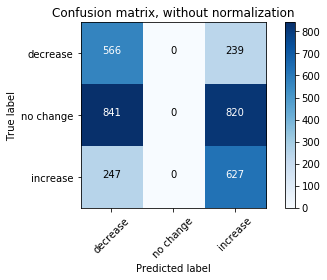

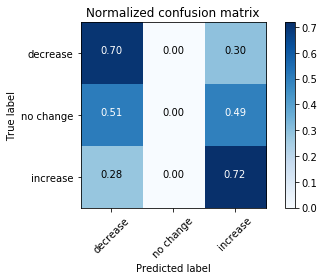

####################################################################################################


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
from sklearn.metrics import confusion_matrix

class_names = ['decrease','no change','increase']

y_true = [np.sign(i) for i in x['x_diff_10-0']]
y_pred = [np.sign(i) for i in x['pivot_diff']]


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print('#'*100)


In [10]:
from sklearn.metrics import  matthews_corrcoef, mutual_info_score
from sklearn.metrics import adjusted_rand_score, r2_score , accuracy_score

cnf_matrix[[True,False,True],:]
cnf_matrix2d = np.delete(cnf_matrix,[1,3,4,5,7]).reshape(2,2)
cnf_matrix2d
oddsratio, pvalue = stats.fisher_exact(cnf_matrix2d)
print('Fischer exact test p-val: ',p_value)
res = stats.chi2_contingency(cnf_matrix2d)
print('Chi-square test p-val: ', res[1])
mcc = matthews_corrcoef(y_true, y_pred)
print("Mathews correlation coef. =", mcc)
acc = accuracy_score( y_true, y_pred)
print('Accuracy score: ',acc)
mi = mutual_info_score( y_true, y_pred)
print('Mutual information score: ',mi)
ari = adjusted_rand_score( y_true, y_pred)
print('Adjusted random score: ',ari)

# oddsratio, pvalue = stats.fisher_exact(y_true, y_pred)

Fischer exact test p-val:  5.21237212364879e-84
Chi-square test p-val:  4.067831477726864e-66
Mathews correlation coef. = 0.18899128165074763
Accuracy score:  0.35718562874251497
Mutual information score:  0.0460433326188138
Adjusted random score:  0.04470995906179443


In [11]:
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
from functools import reduce
import re
from sklearn.metrics import  matthews_corrcoef, mutual_info_score
from sklearn.metrics import adjusted_rand_score, r2_score , accuracy_score
from sklearn.metrics import confusion_matrix
from operator import concat

def cm_stats_2d(xx, yy):
    xx = [i for i in xx]
    yy = [i for i in yy]
    # yy=yy.tolist()
    # pearson_r = stats.pearsonr(xx, yy)
    rho_val, rho_p = stats.pearsonr(xx, yy)
    y_true = [np.sign(i) for i in xx]
    y_pred = [np.sign(i) for i in yy]

    x_mean_pos= np.mean([xx[i] for i, yyy in enumerate(yy) if yyy>0])
    x_mean_neg= np.mean([xx[i] for i, yyy in enumerate(yy) if yyy<0])
    x_median_pos= np.median([xx[i] for i, yyy in enumerate(yy) if yyy>0])
    x_median_neg= np.median([xx[i] for i, yyy in enumerate(yy) if yyy<0])
    # # print(rho, p_value)
    # cnf_matrix[[True,False,True],:]
    cm = confusion_matrix(y_true, y_pred)
    nn = sum(sum(cm))
    cm_32 = np.delete(cm,[3,4,5]).reshape(2,-1)
#    print(cm_32)
    flat_cf = cm_32.reshape(-1,)
    cm_22 = np.delete(cm,[1,3,4,5,7]).reshape(2,2)
    #flat_cf = flat_cf[[0,1,2,6,7,8]]
    _, fischer_p = stats.fisher_exact(cm_22)
    # print('Fischer exact test p-val: ',fischer_p)
    try:
        cont = stats.chi2_contingency(cm_22)
    except:
        cont = (0,0)
    # print('Chi-square test p-val: ', res[1])
    mcc = matthews_corrcoef(y_true, y_pred)
    # print("Mathews correlation coef. =", mcc)
    acc = accuracy_score( y_true, y_pred)
    # print('Accuracy score: ',acc)
    mi = mutual_info_score( y_true, y_pred)
    # print('Mutual information score: ',mi)
    ari = adjusted_rand_score( y_true, y_pred)
    # print('Adjusted random score: ',ari)
    return (nn, *flat_cf, x_mean_neg,x_mean_pos, x_median_pos, x_median_neg,rho_val, fischer_p, cont[1], mcc, acc, mi, ari)
    

def run_cm_stats (date=181219,
                  ob_id=75656, 
                  jump_th=0.0035,
                  jump_int=1):
    # res = (int(ob_id),jump_th)

    os.chdir('/home/hrn/pyITCH/causality/')
    # files = os.listdir()
    # files.sort()
    # o_files = [x for x in files if re.search(str(ob_id), x)]
    # 'causality181129_75656_8205765_1'

    # o_files.sort()
    file_name = 'causality'+str(date) + '_'+ str(ob_id) \
    +'_8205765_' + str(jump_int) +'.csv'
    # print(file_name)
    # print(o_files)
    # x_l = [pd.read_csv(f) for f in o_files]
    # x_l = [x.loc[abs(x['pivot_diff']) > th] for x in x_l]
    # print(o_files)
    class_names = ['decrease','no change','increase']
    x_l = pd.read_csv(file_name)
    x = x_l.loc[abs(x_l['pivot_diff']) > jump_th] 

    lags = [3,4,5,6,8,10,12,18]
    # for  i in range(len(x_l)):
    # print(o_files[i])
    # res += (int(jump_int),)
    # x = x_l[i]
    xx = x['pivot_diff']
    n = len(xx)
    # print(x.shape)
    res=[]

    for j in range(len(lags)):
        # res += 
        col_n = 37 + j
        # print(x.columns[col_n])
        yy = x.iloc[:,col_n]
        # print(yy) 
        res += [[date, int(ob_id),jump_th,int(jump_int),lags[j], *cm_stats_2d(xx, yy)]]
        
        # np.set_printoptions(precision=4,suppress=True,linewidth=120,floatmode="maxprec")
        # print(np.array(res))
        # res=()
        # np.savetxt
    return res

def safe_run_cm_stats(date,ob_id, jump_th, jump_int):
    try: 
        res = run_cm_stats(date,ob_id, jump_th, jump_int)
    except:
        res =[]
    return res


# a = run_cm_stats()
#a = np.asarray(a)
# print(a)
# reduce(concat,a)
os.chdir('/home/hrn/pyITCH/causality/')
col_names=['date','equity', 'jump_th', 'jump_int', 'lead', 'n', 'inc_inc','inc_neut', 
          'inc_dec', 'dec_inc','dec_neut', 'dec_dec','x_mean_neg','x_mean_pos', 'x_median_pos', 'x_median_pos','rho', 'fischer_p',
          'chi_sq', 'mcc', 'acc', 'mi', 'ari']
# ob_id = 75656
id_sym = pd.read_csv('../ob_ids_eq_partitions.csv', index_col='no')
id_sym = id_sym.to_dict()['sym']
csv_files = [f for f in os.listdir('.') if re.match(r'caus+.*\.csv', f)]
all_dates=set((i[9:15]for i in csv_files))
all_obids = set((i[16:21] for i in csv_files))
print(all_dates)
for ob_id in all_obids:
    try: 
        a = [safe_run_cm_stats(date,ob_id=ob_id, jump_th=j, jump_int=i) for date in all_dates
                                 for j in [0.025, 0.035, 0.040] for i in [1,2,4]
                      ]
        a = reduce(concat,a)
        a = pd.DataFrame(a,columns=col_names)
        pd.options.display.float_format = '{:,.3f}'.format
        pd.set_option('display.width', 150)
        # print(a.head(30))

        a.to_csv('foo_' + id_sym[int(ob_id)] + '.csv',index=False)
    except:
        raise Exception


{'181219', '181205', '181130', '181211', '181207', '181203', '181210', '181129', '181206', '181218'}


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


In [288]:

a = cnf_matrix.reshape(-1,)
print(sum(a))
a = a[[0,1,2,6,7,8]]
print(a)
#list(range(6,80,2))
#[len(a)-i -1 for i in range(3)]

641
[113  90  76  89  98 175]


In [ ]:
import re, os
os.chdir('/home/hrn/pyITCH/causality/')
f = os.listdir()
reduced_list = [x for x in f if re.search(r'75656', x)]
?np.set_printoptions

In [ ]:
from sortedcontainers import SortedDict
from operator import neg

class LimSortedDict(SortedDict):
    def __init__(self, *args, **kwds):
        self.size_limit = kwds.pop("size_limit", None)
        SortedDict.__init__(self, *args, **kwds)
        self._check_size_limit()

    def __setitem__(self, key, value):
        SortedDict.__setitem__(self, key, value)
        self._check_size_limit()
    


    def _check_size_limit(self):
        if self.size_limit is not None:
            while len(self) > self.size_limit:
                self.popitem(index=-1)


a = LimSortedDict(neg,size_limit = 2)
a[10] = 'a'
a[11] = 'b'
a[12] = 'c'
a[13] = 'd'
print(a)
print(a.keys())

In [ ]:
from IPython.core.display import HTML
os.chdir('/home/hrn/Backtest/')
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
#css_styling()

In [9]:
import re
os.chdir('/home/hrn/pyITCH/causality/')

id_sym = pd.read_csv('../ob_ids_eq_partitions.csv', index_col='no')
id_sym = id_sym.to_dict()['sym']
csv_files = [f for f in os.listdir('.') if re.match(r'caus+.*\.csv', f)]
all_dates=set((i[9:15]for i in csv_files))
all_obids = set((i[16:21] for i in csv_files))
print(all_dates)

{'181130', '181219', '181206', '181211', '181129', '181205', '181218', '181203', '181210', '181207'}


In [121]:
import dill as pickle
import os
os.chdir('/home/hrn/pyITCH/')
out_pickle_file = 'dist_30_181207.pkl'
handler = open(out_pickle_file,'rb')
a = pickle.load(handler)
#plta
a.head()

,0,1,2,3,4
0,78.714,99.622,42.359,-103.486,1.000
1,7.572,36.647,128.898,55.728,1.000
2,8.709,14.172,40.338,82.964,-1.000
3,-20.192,-25.921,-87.067,-112.979,-1.000
4,33.368,16.911,-21.795,-68.028,1.000


(199, 5)
: [-115.20851328  -32.26590153  -12.60854555   -1.89608319   14.79893743
   38.0225844   128.89814908]
Skewness:  0.20653524122756278


1.3357783932000136

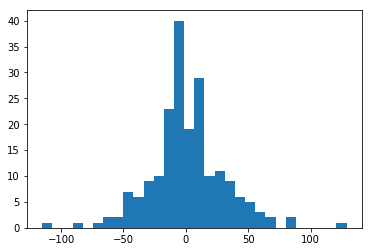

In [142]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plot
import scipy

# a=[6.851802599237999, 18.42161430399574, 18.597390556155005, 35.76313928111631, 99.62161276568077, -2.640776346437633, 3.0083292796771275, -135.88916880826582, 1.0, -0.47302523664257023, -0.47302523664257023, -18.168856753545697, -4.886892681228346, 35.94174931375892, 59.005008898093365, 141.27117228413408, 68.14363665225392, 1.0, 0.0, 3.5746090445900336, -10.778297358658165, -10.778297358658165, -0.13496930987457745, -8.302328160163597, 57.555200010712724, 65.4846454532235, -1.0, 0.0, -10.888464441595715, -19.77965865236183, -28.090453383279964, -65.23877080826787, -80.92413884871348, -106.43758182054444, -97.09070166117453, -1.0, 0.0, -5.601035829633474, -10.22294019945548, -20.638411592619377, -11.00275600826717, -19.645619113158318, -48.550084510832676, -34.22116907981399, -1.0, -4.076773869412136, 1.9854720738658216, 8.68899434710329, 16.518389508899418, -16.675589643084095, -33.125368705092114, -100.81280469024205, -84.12811074918136, -1.0, 0.0, 0.0, -3.752298225532286, 14.604832112134318, 9.876440019346774, 28.02050224687264, 9.838351103811874, 75.10212309223425, 1.0, 9.342468118280522, 9.342468118280522, 9.448427677722066, -13.679387238124036, 10.386011580238119, 33.58468315550999, 51.05492634041002, 72.12783729717194, 1.0, -15.466051370793139, -67.36573395859159, -70.64392185339238, -87.0037657929206, -93.5854440179537, -100.71547191715217, -107.60663187770115, -1.2752846274524927, -1.0, 8.167219607668812, 8.167219607668812, -3.306486050176318, 13.556971396610606, 14.982741355561302, 28.363148754142458, 17.875915118595003, 22.295636877024663, -1.0, 0.0, 0.0, 0.0, -3.4691488616663264, -10.064139540481847, -10.064139540481847, 15.750200526046683, -67.88680433800619, -1.0, 1.5722289288241882, 1.5722289288241882, 6.026106105040526, 8.142608226989978, -39.44621731413645, -49.18181476028985, 65.065138479913, -29.94487541457056, -1.0, 0.0, 0.0, 0.0, -3.7133424314524746, 4.453877176201786, 10.763724732445553, -46.460830986339715, -75.61849873211759, -1.0, 0.0, 0.0, -4.408240544828004, -10.943623125480372, -31.56494575398392, -61.61422680823307, -81.17605297622504, -26.50965283269761, -1.0, 4.592610563064227, 6.164839491859311, 6.164839491859311, 4.9400046049267985, -4.328875708262785, 5.098781209264416, 0.8913149551372044, 31.322886776310042, -1.0, 0.0, 2.5958233617420774, 1.459284035328892, 0.32274470893025864, 2.6588357757864287, 1.063139226011117, -14.246252547585755, -22.726835545225185, -1.0, 1.1365393264131853, 0.0, 1.1365393264131853, -2.142386268111295, -5.968695131698041, -4.502425762329949, 35.051228427590104, 70.71308700107329, 1.0, 0.0, 0.0, 1.471798566315556, 1.471798566315556, 0.005529196947463788, 10.437733054510318, 1.0640865683963057, -2.2407043359125964, -1.0, 0.0, 0.0, -1.9343876013008412, -32.157120241376106, -36.11655570640869, -31.48912213962467, -29.914624993674806, -104.65490030654473, -1.0, 0.0, 0.0, -21.243764755723532, -32.029743621635134, -53.14978328906, -51.74716993815673, -44.19120409298921, -6.157927612992353, -1.0, 0.0, -0.47650264819094446, -1.6130419746041298, -6.462923732455238, -10.543060191499535, 22.69531133385317, 23.86379925548681, 9.3276802450564, -1.0, 0.0, 0.0, 0.0, -0.7987148805259494, 0.673915680454229, 6.7599750816007145, 8.467113463251735, 22.402677650097758, 1.0, 0.0, 0.0, 0.0, -1.471798566315556, -4.404337305080844, 19.950642588621122, 51.80655147426296, 65.12598071906541, 1.0, 0.0, 0.0, -1.1244045244529843, -2.2609438508661697, 10.784732531232294, 8.200664242423954, 17.137014331456157, 22.00506548170233, 1.0, 0.0, 0.0, -2.732235876188497, -15.91659046060522, -10.371725732562481, -14.462007201786037, -42.04677292176348, -50.366432256341795, -1.0, 0.0, 0.0, 0.0, 6.408782385013183, 14.882051696928102, 26.7017353483825, 42.18851869509672, 111.41572100088524, -1.0, 0.0, 0.0, 26.373364565049997, 25.596354082488688, 34.59460670466069, 43.16313493982307, 25.473172093668836, 37.71680029180425, -1.0, 0.0, 0.0, -1.9343876013008412, -4.544892101330333, 3.622327506323927, 13.84961609596212, 58.634563964718836, 0.380018908996135, 1.0, -7.175122010157793, -21.019513272782206, -24.488662134448532, 55.3414792187541, 93.40531671325152, 128.0232048917096, 170.98599797836505, 191.83971192629542, 1.0, 0.0, 10.568180832793587, -4.020880267984467, -3.6830558221117826, -8.057228095582104, -36.76205349745578, 7.749795522991917, 28.190427812704, -1.0, 0.0, 0.47302523664257023, 9.758023822476389, 7.393827776089893, -5.10197029808478, -13.269189905768144, -10.947724832585664, -10.996321334925597, -1.0, -11.182008327508811, -10.045469001110177, -18.21268860877899, -29.3946969362878, -27.487569473858457, -30.282204950097366, -27.07882660125324, -29.676385230981396, -1.0, 0.0, 0.0, -10.010060639266158, 3.242548125272151, 3.242548125272151, -0.33211610386206303, 1.48146720296063, -24.285256151430076, -1.0, 0.0, 2.1049736643763026, -2.4910029095044592, 2.6287594747409457, -6.128851003464661, -21.588734917590045, -21.602528816772974, -26.664044119650498, -1.0, 0.0, 4.592610563093331, 5.717015087517211, -6.931262609359692, 3.607614639098756, 6.849127629917348, 0.5130127773154527, -2.769424273967161, -1.0, 0.0, 0.0, -8.16721960765426, 0.0, 1.9898018672829494, -1.2600849235313945, 25.623981483789976, 59.62838630049373, -1.0, 0.0, 0.0, 3.7448772191419266, 2.6083378927287413, 10.229409044521162, 6.0534870362171205, 6.650733269925695, -26.420346764774877, 1.0, -7.175122010157793, -1.1995517404575367, 7.384356422000565, -0.20425582233292516, 10.212379178614356, 20.33853881644609, 16.57519797165878, 17.533168918380397, 1.0, 0.0, 0.0, 0.0, 0.0, -12.653806893838919, -18.692389577583526, -12.102125480392715, -20.658662715548417, 1.0, -14.350244020301034, -14.350244020301034, -12.878445453985478, -23.65400295438303, -23.65400295438303, -11.936155450195656, -16.799394576257328, -19.510022086644312, -1.0, 7.175122010157793, 7.175122010157793, 7.175122010157793, 0.0, -23.67510100794607, -8.319010045932373, -4.174279337996268, 0.03361689095618203, -1.0, 4.744366390397772, 7.108562436784268, 7.108562436784268, 5.477760544250486, -5.05365510979027, -3.119267508489429, 6.3810947540041525, -44.19138313160511, 1.0, 0.0, 12.378121893270873, 12.378121893270873, 12.378121893270873, 11.253717368817888, 12.719986738215084, 35.853034108440625, 57.26420840490027, -1.0, 0.0, 0.0, 4.592610563078779, 0.5158366936811944, 3.0983481407456566, -13.545466241557733, -6.487924380155164, -10.51739322260255, -1.0, 0.0, 0.0, 4.83222502724675, -8.167219607639709, -23.426001804560656, -26.341495961110923, -22.088301190102356, 16.10900315834442, -1.0, 9.22248689281696, 9.22248689281696, 10.694285459147068, 15.286896022225847, 1.5696791713271523, 0.018701729204622097, 4.885628069270751, 0.6211562029347988, -1.0, 8.16721960765426, 8.16721960765426, 15.342341617797501, 15.11071430244192, 11.53610525788099, 18.099711187620414, 31.94410245025938, 33.80641593101609, -1.0, 0.0, 0.0, 0.0, 0.0, -3.7362944952910766, -4.87283382168971, -11.105805070677889, 32.86169147086912, 1.0, 0.0, 2.932316616148455, -3.382689307036344, -1.910890740706236, -6.0712240310094785, 0.025714432558743283, 9.34924022872292, 15.393209445624962, 1.0, 0.0, 0.0, -0.7987148805259494, -0.7987148805259494, -5.282463800249388, 2.884755807404872, -1.8818068295659032, -11.671265993078123, 1.0, 0.0, 0.0, 0.0, -3.7133424314379226, -19.921929740463383, -28.697958923265105, -24.13648553432722, -15.98366980436549, 1.0, 0.0, 0.0, 0.7987148805259494, 0.7987148805259494, 4.875488749938086, 6.012028076351271, 26.021693378366763, 19.96927566830709, -1.0, 0.0, 0.0, -8.16721960765426, 0.0, 9.303758934081998, 8.076102214094135, -1.8804366874683183, -29.622424839049927, -1.0, -0.47650264819094446, -0.47650264819094446, 6.698619361966848, 6.698619361966848, -32.913410722103436, -36.99018459151557, -8.064393193708383, -15.89457702654181, 1.0, 0.0, 0.0, -4.592610563078779, 0.608567830757238, 1.7329723551956704, -0.7463717531354632, -52.730279204421095, -60.77812900952995, 1.0, 0.0, 0.0, -0.7987148805405013, -0.7987148805405013, -13.693301031074952, -22.924523901179782, -20.80520318762865, -23.714308809896465, -1.0, 8.167219607668812, 8.167219607668812, 8.167219607668812, -8.53826207293605, -3.014483078295598, -28.781573342334013, -68.17989574529929, -11.132748492454994, -1.0, 0.0, 0.0, 6.321680324181216, 5.185140997782582, 11.417973004150554, 3.250753396481741, 28.596300962643, 34.435949441671255, 1.0, 0.0, 0.0, 0.0, 3.4560712366801454, -3.239349804673111, -4.199466904945439, 2.4936773330700817, -5.926108699262841, 1.0, 0.0, -5.091807363423868, -5.091807363423868, -5.091807363423868, -13.57415726481122, -2.056889697385486, 2.2745709184528096, 3.7408402878354536, 1.0, 0.0, 0.0, -1.1365393263986334, -1.9352542069391347, -4.9989533374027815, -9.591563900496112, -7.6563096935424255, 8.010751588852145, -1.0, 0.0, 0.0, -0.7987148805405013, -3.3945382422825787, -2.6013525586749893, -3.593450156171457, -3.6355490863352316, -16.43917819863418, -1.0, 0.0, 0.0, 0.0, 0.0, 0.47650264820549637, 0.47650264820549637, -0.32221223233500496, -7.403961244810489, 1.0, -93.47938100495958, -99.41818609592156, -96.1748517024098, -84.29428966328851, -82.92233045703324, -50.65305805334356, -35.3105166835885, 2.088835557035054, -1.0, 0.0, 0.0, 0.0, 3.4560712366801454, 5.390458837966435, 1.4607816257339437, -7.842977308333502, 32.4818237053405, 1.0, 0.0, 0.0, 0.0, 0.0, 8.167219607668812, 8.841169899096712, 18.475702756550163, 19.576031012664316, -1.0, 1.9343876013008412, -3.157419762123027, 2.904826181154931, 0.5406301347684348, 3.7035410616808804, 0.6317475283285603, 1.7188943265355192, -39.33049134869361, -1.0, 1.1365393263986334, -1.4717985663301079, -1.4717985663301079, -1.4717985663301079, 3.7917324964073487, -0.8657770718855318, 15.887003971452941, 2.4931517986260587, -1.0, 0.0, 0.0, 0.0, 0.0, -2.8091121834440855, -2.8091121834440855, -5.041968420162448, -18.021619176419335, 1.0, 0.0, 0.0, 4.592610563078779, 5.39132544361928, 11.453571386897238, 11.453571386897238, 2.3489035118109314, -80.89070001793152, 1.0, 2.364196046386496, 4.298583647687337, 4.298583647687337, 1.9343876013008412, -13.840231289315852, -48.970121531310724, -54.59928410546854, -51.13586769372341, 1.0, 0.0, 0.0, 0.0, 1.1365393263986334, 6.784269359151949, 14.198126907649566, 11.885227858554572, 16.79731258614629, 1.0, 0.0, -1.1365393264131853, -1.471798566315556, 0.46258903498528525, 7.637711045128526, 14.812833055286319, 3.2955654878605856, 80.74053851206554, -1.0, 0.0, 0.0, 1.1365393264131853, 1.1365393264131853, 1.1365393264131853, 0.0, 47.360197014102596, 13.821742836924386, -1.0, 0.0, -5.069113211269723, -4.592610563078779, -5.069113211269723, -5.867828091810225, -5.39132544361928, -3.9195268772891723, 0.3639490784262307, 1.0, 0.0, 1.9343876013008412, 15.778778863939806, 19.492121295363177, 15.778778863939806, 16.91531819033844, 20.975244314147858, -0.37632987795223016, 1.0, 0.0, 0.0, 0.0, -6.062245943263406, -15.695734920285759, -15.695734920285759, 3.8540790751285385, 22.694964392096153, -1.0, 0.0, 0.0, 0.0, 0.0, 1.471798566315556, 1.471798566315556, -10.270291605134844, 74.78390855432372, 1.0, 0.0, 3.7133424314524746, 4.837746955905459, 0.6777736197691411, 4.837746955905459, 1.3816757192253135, 15.044963041873416, -42.97309549689817, 1.0, 0.0, -11.182008327523363, -11.182008327523363, 0.0, -35.06018274028611, -33.935778215833125, -58.43743703881046, -64.29688071436249, 1.0, 0.0, 0.0, -13.418409993013483, -13.418409993013483, -13.418409993013483, -20.744123037933605, -18.473609591077548, -4.2952285127248615, 1.0, 0.0, 0.0, 1.1365393263986334, 1.1365393263986334, 4.849881757836556, 4.849881757836556, 2.241543865107815, 2.241543865107815, -1.0, 1.9225299534009537, -2.4752654907497345, -5.160428912437055, -33.121954125745106, -43.84818678900774, -24.49895885384467, -20.445389781612903, -16.532314430587576, -1.0, 1.1365393263986334, 5.082190836255904, 3.6103922699257964, 5.076661639322992, 0.9998877699108562, 2.1364270963240415, -2.67455059090571, 45.53374599789095, 1.0, 0.0, 1.1365393264131853, 1.1365393264131853, 1.1365393264131853, 1.9352542069391347, 7.612425861923839, -1.4742870956397383, -2.1553754686610773, -1.0, 8.167219607668812, 8.167219607668812, 8.167219607668812, 5.508996645876323, 17.74383818160277, 13.28996100538643, 27.949736900511198, 29.44047492687241, 1.0, 0.0, 0.0, 0.0, 1.1244045244384324, -4.549799106040155, 0.3256896438979311, -4.679624885102385, -7.270298778908909, 1.0, 0.0, 0.0, 0.0, 3.1469366293167695, 4.283475955715403, 1.3420420092152199, -7.253419976637815, -13.474441266269423, -1.0, 0.0, 0.0, 2.6083378927287413, 2.6083378927287413, 3.9145966765645426, 6.325486926056328, 18.637638777392567, -2.4414257250755327, 1.0, 0.0, 0.0, 0.0, -3.609525664287503, -4.77348620374687, -14.077245137799764, 26.589182231226005, 13.987754633286386, 1.0, 0.0, 0.0, -8.167219607668812, -8.167219607668812, 13.959206526706112, -23.835010383001645, -18.6722225992562, -31.501682869609795, 1.0, 0.0, 0.0, -7.426684862875845, -15.593904470544658, -14.920820784755051, -14.920820784755051, -17.0915600599983, -77.26695306210604, -1.0, 0.0, -4.592610563093331, -6.526998164394172, 5.716995312672225, 4.245196746342117, 13.354706357800751, -8.291658853573608, 0.46465756006364245, -1.0, 0.7987148805405013, -7.368504727113759, -7.368504727113759, -21.283615536463913, -25.324798204863328, -25.324798204863328, -71.09928295796271, -130.51343068490678, -1.0, 6.964095827905112, 6.964095827905112, 5.839691303481231, 18.956087232290884, 18.956087232290884, 20.835146056706435, 13.262146025925176, 9.97865544972592, 1.0, 0.42980844508565497, 0.42980844508565497, 3.456937842318439, -8.310794730918133, -76.81983213924104, -87.2031255862239, -99.17053608087008, -98.66665953681513, -1.0, 0.0, -1.9343876013008412, -6.52699816437962, -7.197918664038298, -4.833722617651802, -4.833722617651802, -12.472461342593306, -3.5993774592643604, 1.0, 0.0, 0.0, 1.471798566315556, 1.471798566315556, 12.653806893838919, 12.653806893838919, 8.061196330745588, 48.409625992993824, 1.0, 0.0, 0.0, 0.0, 0.0, 1.466269369397196, 1.466269369397196, -4.731542716806871, -1.9842122675472638, 1.0, -1.9343876013008412, -1.9343876013008412, -1.9343876013008412, 0.8868593841325492, 8.364099291415187, 29.74306887142302, 43.43719444250746, -42.2637165163178, -1.0, 4.592610563078779, 1.9967872013367014, 1.1980723207962, 3.121191725775134, 4.580475761104026, 5.363015440612799, -6.860051080904668, 6.566961916672881, -1.0, 0.0, 1.1365393264131853, 1.1365393264131853, 0.0, 1.1244045244529843, 0.32655624956532847, -12.97563939714746, 3.9140742904419312, -1.0, -9.284998585833819, -8.808495937642874, -8.808495937642874, -9.284998585833819, -9.94503526405606, -8.808495937642874, -19.270451884585782, -4.681445968351909, 1.0, 0.0, 0.0, 8.16721960765426, 13.236332818938536, 19.073224886335083, 19.549727534526028, 11.665074621574604, 9.701207778576645, 1.0, 0.0, 1.471798566315556, 1.471798566315556, -1.5516354434075765, -1.5516354434075765, 2.6083378927287413, -3.2829891895817127, -21.696177397694555, 1.0, 0.0, 0.0, 8.167219607683364, 5.906275756817195, 18.22482341073919, 18.22482341073919, 27.189891293281107, 59.59306338781607, -1.0, 6.774285150255309, 6.774285150255309, -9.937398298468906, -7.994626280880766, -15.10673587700876, -17.839838358850102, -20.74899091226689, -35.81349374822457, 1.0, 0.0, 0.0, 1.2752175287314458, 1.2752175287314458, 4.675874499400379, 5.097298528227839, -44.05834498119657, -16.342581288176007, 1.0, 0.0, 0.0, 2.932538738765288, -0.1938024549453985, 9.027988404443022, 3.306932917854283, -2.5142607280577067, -1.0368806622718694, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4494596865552012, 69.58903965527134, 1.0, 0.0, 0.0, 0.0, 0.0, 15.342341617826605, 16.141056498352555, 48.67469420249108, 47.82307399244746, -1.0, 0.0, 0.0, -0.7987148805259494, -0.32221223233500496, -0.32221223233500496, -0.32221223233500496, 6.6828520446579205, -6.524298381627887, -1.0, 0.0, 0.0, 0.0, 2.248809048862313, 0.0, 0.0, 55.57083971469547, 92.66931833614944, -1.0, -12.586841985961655, -14.058640552277211, -14.058640552277211, -4.9603991371404845, -1.610731039516395, -14.835851938274573, 14.698502910672687, 8.933871769957477, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -46.19660564734659, -65.7943596879777, 1.0, 0.0, 11.182008327508811, 17.41484033386223, 17.41484033386223, 10.239718323704437, -13.865663169824984, -41.74951955770666, 2.2562649058527313, -1.0, 0.0, 4.592610563093331, 0.0, -4.076773869397584, -3.60027122120664, 5.1069904008327285, -30.885711477749282, 11.501636337823584, -1.0, 0.0, 1.1365393264131853, 1.1365393264131853, 10.295856531578465, 16.85946246131789, 31.085562001433573, 25.24039257883851, 10.58630266172986, 1.0, -8.167219607639709, -8.167219607639709, -8.167219607639709, -8.167219607639709, -16.33443921529397, -5.345972622249974, -13.451132775910082, 5.852024945488665, -1.0, -1.471798566315556, -0.3473940418625716, 0.7891452845360618, 0.7891452845360618, 26.877530024255975, 29.952942268486368, 16.193001745981746, 73.15482600213727, 1.0, 8.16721960765426, 8.16721960765426, 8.16721960765426, 7.030680281241075, 46.199462337608566, 46.199462337608566, 36.120395734513295, 62.33055201242678, 1.0, 0.0, 1.9343876013008412, 0.0, -0.7987148805405013, 8.16721960765426, -2.5202349223400233, -25.9436382411659, -54.91143499968166, 1.0, 0.0, 0.0, 0.0, 2.364196046386496, 24.991595056751976, 18.914056578927557, -2.4843939964775927, -1.0311775851005223, -1.0, 0.0, 0.0, 0.0, 0.3473940418771235, 5.465372969003511, 4.340968444565078, 2.1247086444491288, 10.82700740499422, 1.0, 0.0, 0.0, 0.0, 1.1244045244529843, 7.543417375491117, 7.500811654070276, 0.267507717711851, 11.859049532402423, 1.0, 0.0, 5.975570269700256, 23.40905848608236, 16.44425713334931, 28.24128351332911, 24.666674468739075, 30.898639869468752, 26.737625934314565, 1.0, 0.0, 0.0, 1.1365393264131853, 1.1365393264131853, -2.8091121834440855, -2.8091121834440855, 4.531077568695764, 13.625526312855072, -1.0, 5.499067621509312, 5.499067621509312, 22.275997622899013, 22.275997622899013, 21.9425171942421, 22.7412320747826, 26.959616721374914, 21.42372190754395, 1.0, 0.0, 0.0, 0.0, 3.945651509857271, 2.4793821404891787, -18.77651741722366, -15.101448670699028, -18.732477829558775, -1.0, -1.1244045244529843, -0.6479018762620399, -1.1244045244529843, -5.201178393865121, -1.9231194049934857, -32.31759418803267, -109.75162875870592, -132.01794786084793, -1.0, 0.0, 0.0, -6.077538477824419, -2.364196046401048, -6.956806609479827, -9.321002655866323, -9.321002655866323, -14.95166206828435, -1.0, 0.0, 0.0, -6.559815095795784, -11.911742024327395, -9.686156289491919, 8.057146553444909, -2.239963234998868, -16.81894934628508, 1.0, 0.0, 0.0, 0.0, 0.0, 2.6582229618070414, 1.533818437354057, -17.111182055188692, -25.71410248716711, -1.0, 0.0, 0.0, 0.0, 0.906457058415981, 7.3585299763362855, 21.20292123897525, 55.06121254997561, 19.634927349397913, -1.0, 0.0, 13.844391262624413, 13.844391262624413, 10.421537912232452, 9.284998585833819, 3.226118653357844, 4.967123537673615, 11.958105825688108, 1.0, -4.076773869412136, -4.076773869412136, -5.201178393850569, 0.8763600839738501, 16.83369599247817, 2.0499827505409485, 25.101382523804205, -0.9110481580864871, 1.0, -5.975570269700256, -1.5216930934693664, -1.5216930934693664, -13.812285726569826, -13.275262168885092, -9.231080625613686, 33.20967234855925, 45.25760239522788, -1.0, 0.0, 0.0, 1.1244045244529843, 7.797381484604557, 6.998666604064056, 6.998666604064056, 7.6731689605658175, 67.57661384952371, 1.0, 0.0, 0.0, 0.0, 0.0, -18.011020556106814, -17.67576131618989, 46.24780789705983, 23.5250955044321, 1.0, 1.9343876013008412, 0.46811823193274904, 0.46811823193274904, 8.378076102933846, 7.241536776520661, -7.025008580269059, -1.8474475531256758, -47.76442273473367, -1.0, 0.0, -8.167219607668812, 2.4876368986879243, -21.79728904402873, -4.6672829497547355, -1.7907738735084422, 34.72306661470793, 5.511534968405613, -1.0, 0.0, 0.0, 37.73042967567744, 32.54528867792396, 31.532175906802877, 33.11363137027365, 28.044518158989376, -41.368338591768406, 1.0, -11.767732573236572, -14.774180772859836, -11.320272722325171, -16.41208008574904, -9.047992784384405, -1.5139482747908914, 14.250004916757462, -13.996499902248615, 1.0, 0.0, 0.0, 0.0, 0.7987148805405013, 6.774285150255309, -12.30641285191814, -2.223663114957162, -2.8541937811969547, 1.0, -6.062245943277958, -6.062245943277958, 0.0, 0.0, 22.83020625008794, 7.162987208197592, 3.477072113266331, 49.94657150559942, 1.0, 0.0, 0.0, 8.16721960765426, -1.1244045244384324, 4.452141189394752, -16.17825541921775, 5.167592133584549, -10.07067735461169, -1.0, 0.0, 0.0, -6.062245943277958, -5.2635310627374565, 2.17314420574985, 18.024455226594, -9.43968475823931, -23.84847292196355, -1.0, 0.0, 0.0, 0.0, -0.47650264820549637, 8.560013402049663, 12.028219440690009, 6.143161924090236, 4.391720838088077, 1.0, -25.026399590147776, -25.026399590147776, -25.80893926965655, -19.28194110527693, -24.99895619280869, -23.552339436020702, -11.484226929271244, 41.60028908048116, 1.0, 3.945651509842719, 2.8212469854188384, 2.8212469854188384, 10.487126381442067, 5.8945158183487365, 69.5132753921207, 88.23053249824443, 71.76590268418659, -1.0, -8.16721960765426, -8.16721960765426, -12.75983017073304, -24.85902941940003, -4.578938694219687, -0.3573705964226974, -5.568663383048261, -31.430219220157596, 1.0, 0.0, 0.0, 1.9343876013008412, 6.399203783497796, 9.716006567541626, 8.917291687001125, 28.530363142184797, 158.85400923414272, -1.0, 0.0, 0.0, 4.83222502724675, 3.945651509857271, 1.4093718099757098, -5.970455499293166, 17.5648669834045, 58.35026087722508, -1.0, 8.167219607683364, 8.167219607683364, 1.055110011540819, -8.908109008480096, -20.826517659646925, -22.595671120026964, 11.846425677285879, 72.52061680787301, -1.0, -4.592610563093331, -4.592610563093331, -5.069113211284275, -3.602843841901631, 11.371101413096767, 29.6319805241219, 34.06566706675221, 21.219608229905134, 1.0, 13.418409993013483, 13.418409993013483, 13.418409993013483, 38.44480958316126, 15.219206407069578, 9.269336186378496, -1.1638599745929241, -36.38447215978522, -1.0, 0.0, 0.0, 4.592610563078779, -1.5654811658605468, -14.28584763307299, -74.15431123967574, -95.95607521693455, -168.3279196039366, 1.0, -3.7133424314379226, 2.0158074580540415, 30.750407280022046, 14.438921532942913, 20.290063672189717, -17.083301048609428, -29.469637132031494, -15.522542437611264, -1.0, 0.0, -0.47650264819094446, -1.1365393263986334, -1.1365393263986334, 1.9981862835848005, -7.746730294864392, 38.30328191895387, 6.136780059125158, -1.0, 0.0, 0.0, -4.592610563078779, -4.592610563078779, 14.875036970188376, 23.412735949124908, 25.147741033695638, 25.81649693613872, -1.0, 0.0, 0.0, -3.625537994026672, -29.22514877654612, -31.807660223610583, -116.94832132880401, -135.81397573270078, -145.48427795119642, -1.0, 0.0, 1.463512957750936, 7.965551282119122, 16.07117612809816, 27.78931652767642, 30.254156772527494, 64.02618611764046, -66.84014145516267, -1.0, 0.0, 6.695421041324153, 10.825442569432198, 9.684417926502647, 16.117550126378774, 26.867059211581363, 34.70489397420897, 77.91323278839991, 1.0, -4.592610563093331, -4.592610563093331, -0.87926813166996, -0.87926813166996, -1.3557707798754564, 3.4850628695858177, 40.5904063655762, 98.59802271233639, -1.0, -4.592610563093331, -0.6469590532360598, -8.81417866089032, -1.7834983796492452, -23.45142291576485, -22.327018391311867, -64.66192300715193, -35.73579268802132, -1.0, 0.0, 0.0, 3.0284605886990903, 3.0284605886990903, -1.68668348659412, -4.282506848336197, -1.5450603492790833, 67.58707330710604, 1.0, 0.0, 0.0, -4.553276517603081, -52.06912827238557, -55.60832895510248, -70.81836364600167, -116.86030855996069, -132.88184264794108, 1.0, 6.325582918289001, 11.394696129573276, 10.918193481382332, 10.918193481382332, 11.907960202574031, 17.111012388166273, -1.1918610213615466, 11.396210333230556, 1.0, 0.0, -0.32221223233500496, 1.2908297422691248, 5.406937657156959, 12.37780384501093, -6.111176215228625, -13.628163070316077, -1.975938759467681, 1.0, 0.0, 0.0, -6.700950238286168, 1.4662693693680922, -2.9876078068336938, -3.786322687374195, -40.37894427808351, -59.2426025869936, -1.0, 0.0, 0.0, -7.030680281241075, 7.342191864110646, -9.251737342652632, -14.669375649289577, -18.15605357362074, -4.614659752958687, 1.0, 4.592610563093331, 2.986553922513849, 4.452823291911045, 9.290309187839739, 23.15134034381481, 14.826367092580767, 18.253417024068767, 69.88660455147328, -1.0, 0.0, 0.0, 10.705505679317866, 9.568966352919233, 9.568966352919233, 52.12456158110581, 29.602796001563547, 60.98180782691634, -1.0, 0.0, 11.105287543337909, 0.3422445739415707, 3.022636626032181, 7.5173665840993635, -1.1240247954265215, 14.257355383291724, 10.53823656597524, -1.0, -1.4717985663301079, -0.3352592399169225, 1.1365393263986334, -1.4662693693680922, 11.182008327508811, 5.117599198099924, 41.23283854914189, 49.34726528637111, 1.0, 0.0, 2.932538738765288, 2.932538738765288, 10.135653801859007, 8.669384432490915, 3.1263411937252386, -22.959876938693924, -5.306288746302016, 1.0, 1.1365393263986334, 1.6130419746041298, 3.0709269276994746, 15.92555146914674, 27.270029052888276, 47.82801474285952, -16.196168537295307, 21.23422094489797, 1.0, 0.0, -8.16721960765426, -9.633488977036905, -23.051898970050388, -16.168871557689272, -31.200323525306885, -59.10417699154641, -100.52705472405069, 1.0, 5.14285037603986, 1.4295079445873853, 1.4295079445873853, -9.361130091463565, -15.593962097816984, 11.117383507807972, -12.111704461305635, -52.38156058047025, 1.0, 0.0, 0.0, 0.47650264819094446, -5.601035829633474, -8.441734524210915, -20.819856417452684, -41.81628716965497, 1.192290836435859, -1.0, 2.2415438651369186, 2.2415438651369186, 13.252660487996764, 12.776157839805819, 58.253626081044786, 66.36388681462267, 111.96005062325276, 171.2790809392609, -1.0, 2.2705134468560573, 2.2705134468560573, 2.2705134468560573, 52.87228986489936, 35.19001194050361, 44.96560031520494, 106.71840276410512, 107.15595041694178, 1.0, 0.0, 12.244235221442068, 13.816464150237152, 39.87853070216079, 14.451764289158746, 11.4571711482713, 0.7285170344111975, 15.247118743223837, 1.0, 0.0, 0.0, 4.159973336121766, 13.444971921955585, 23.565150256938068, -25.970481038209982, -78.55875295012083, -86.23089031716518, 1.0, 5.729149889491964, 5.729149889491964, 1.1365393264131853, -11.402602534959442, -21.145083512266865, -26.080501743315835, 2.130438738153316, -5.1636136349407025, -1.0, -4.592610563078779, 0.0, -4.592610563078779, -4.592610563078779, 9.139254286084906, 9.139254286084906, 4.993095482583158, 16.92119456200453, -1.0, 0.0, 0.0, 0.0, 0.0, 0.3549308752262732, -27.799918895296287, -50.30433821801853, -36.72984548629029, 1.0]
print(a.shape)
na = np.array(a)
# na = na.reshape(da , 5)
x = na[:,2] * na[:,-1]
print(':', np.quantile(x, [0,.1, 0.25, .5, 0.75,.9, 1]))
plot.hist(x, bins=30)
# pd.DataFrame(x).plot(kind='hist')
print('Skewness: ', scipy.stats.skew(x))
np.mean(x)

In [ ]:
np.quantile(x, [0,.1, 0.25, .5, 0.75,.9, 1])
a = np.array([[1,2],[3,4]])
b = np.array([[1,2]])
c = np.array([[1,2],[3,4]])
l = [a,b,c]
l = np.concatenate(l)
(l[:,1]==2)

In [67]:
import dill as pkl
import pandas as pd
f = open('/home/hrn/moldDump/pickles2/lobs_180711_74196.pkl', 'rb')
a = pkl.load(f)
ob = a.pd_data
f.close()
type(ob)

pandas.core.frame.DataFrame

In [70]:
ob.tail()

,MoldPacketNo,TimeStamp,Bid,Ask,OrderBookState,Messages,obid
161883,3059826,2018-07-11 18:00:00.011508501,"[(6.96, 205718), (6.95, 263183), (6.94, 145057...","[(6.97, 173014), (6.98, 444448), (6.99, 327792...",P_SUREKLI_ISLEM,"[[A, B, 6.9, 2750, 3059826]]",74196
161884,3059836,2018-07-11 18:00:00.058324813,"[(6.96, 205718), (6.95, 263183), (6.94, 145057...","[(6.97, 172974), (6.98, 444448), (6.99, 327792...",P_SUREKLI_ISLEM,"[[E, S, 6.97, 40, 3059836]]",74196
161885,3059837,2018-07-11 18:00:00.058484652,"[(6.96, 205718), (6.95, 263183), (6.94, 145057...","[(6.97, 172974), (6.98, 444448), (6.99, 327792...",P_SUREKLI_ISLEM,"[[D, S, 7.2, 26700, 3059837]]",74196
161886,3059845,2018-07-11 18:00:00.074899489,"[(6.96, 205718), (6.95, 263183), (6.94, 145057...","[(6.97, 172974), (6.98, 444448), (6.99, 327792...",P_SUREKLI_ISLEM,"[[D, S, 7.38, 23310, 3059845]]",74196
161887,3059853,2018-07-11 18:00:00.082609033,"[(6.96, 205718), (6.95, 263183), (6.94, 150557...","[(6.97, 172974), (6.98, 444448), (6.99, 327792...",P_SUREKLI_ISLEM,"[[A, B, 6.94, 5500, 3059853]]",74196


In [38]:
import pandas as pd
# ob.to_json('/home/hrn/moldDump/pickles2/lobs_190319_78126.json',index=True, orient='records')
# print(ob.shape)
ja = pd.read_json('/home/hrn/moldDump/jsons/lobs_190315_74196.json', orient='records')

# ja.head().to_latex()
ja[['Ask', 'Bid','Messages','TimeStamp']].to_json('/home/hrn/lob74196.json')

In [44]:
with open('/home/hrn/moldDump/pickles2/deneme.pkl', 'wb') as f:
    ss = pkl.dump(ob,f)
# ?pd.to_pickle

In [66]:
# print(ob.shape)
import time
a = time.time()
ja = pd.read_json('/home/hrn/moldDump/pickles2/lobs_180711_74196.json', orient='records')
print(time.time() - a)
# ja.tail()


1.716212511062622


46741947